k
0.02    14412.530721
0.05     9569.117009
0.10     8425.076107
1.00    21779.281287
2.00    13974.743115
Name: time_minutes, dtype: float64


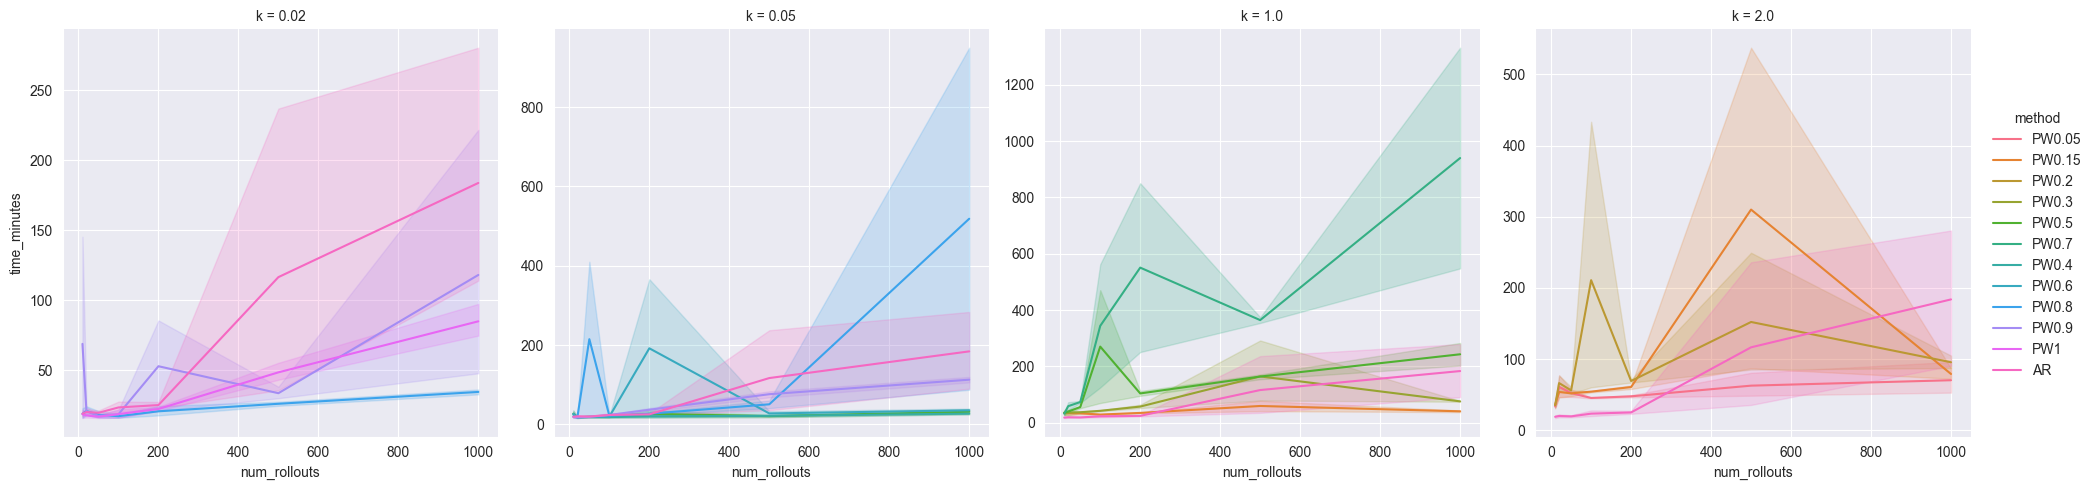

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import seaborn as sns
from stoch_mcts.game.game import Trap
from stoch_mcts.mcts.mcts import MCTS
from stoch_mcts.mcts.selector import ProgressiveWidening, AbstractionRefining, sampler
from stoch_mcts.mcts.backpropagator import *
from stoch_mcts.trainer.trainer import run
from stoch_mcts.agent.agent import Agent
from stoch_mcts.mcts.selector import *
from stoch_mcts.mcts.evaluator import *

# Parameters
n_trials = 1000
num_rollouts = [1000]
k_values = [0.02, 0.05, 1, 2]
#pw_exponents = [0.7, 0.8, 1] #k = 0.02
pw_exponents = [0.9] #[0.5, 0.6, 0.7, 0.8, 0.9] #k = 0.05
# pw_exponents = [0.15, 0.3, 0.5, 0.7] k = 1
ar_exponent = 0.1
ar_factor = 0.1

# Initialize an empty DataFrame
df_ = pd.DataFrame()

# Load and concatenate DataFrames
for k in k_values:
    df = pd.read_csv(f"df/df_{k}_n.csv")
    df_ = pd.concat([df, df_], ignore_index=True)

# Initialize a new DataFrame for the duplicated rows
duplicated_rows = pd.DataFrame()

df_ = pd.DataFrame()

# Load and concatenate DataFrames
for k in k_values:
    df = pd.read_csv(f"df/df_{k}_n.csv")
    if k ==2:
        df = df[df['exp'] < 0.3]
    df_ = pd.concat([df, df_], ignore_index=True)
    
sm = df_.groupby(by="k")["time_minutes"].sum()

print(sm)

# Initialize a new DataFrame for the duplicated rows
"""duplicated_rows = pd.DataFrame()

# Duplicate rows with noise in 'expected_return'
for _ in range(2):  # Duplication twice to get three copies in total
    temp = df_.copy()
    
    # Separate rows based on 'method'
    temp_ar = temp[temp['method'] == 'AR']
    temp_non_ar = temp[temp['method'] != 'AR']
    
    # Add noise
    noise_ar = np.random.normal(loc=0, scale=0.001, size=temp_ar['expected_return'].shape)
    noise_non_ar = np.random.normal(loc=0, scale=0.005, size=temp_non_ar['expected_return'].shape)
    
    # Apply noise
    temp_ar['expected_return'] = temp_ar['expected_return'] * (1 + noise_ar)
    temp_non_ar['expected_return'] = temp_non_ar['expected_return'] * (1 + noise_non_ar)
    
    # Concatenate the noisy data back together
    temp_noisy = pd.concat([temp_ar, temp_non_ar])
    duplicated_rows = pd.concat([duplicated_rows, temp_noisy])

# Concatenate the original DataFrame with the duplicated rows
df_ = pd.concat([df_, duplicated_rows], ignore_index=True)"""

# Initialize a new DataFrame for additional rows
new_rows = pd.DataFrame()
ar_rows = df_[df_['method'] == 'AR']

# Duplicate rows with 'AR' method and change 'k' values
for k in k_values:
    temp = ar_rows.copy()
    temp['k'] = k
    new_rows = pd.concat([new_rows, temp])

# Add the new rows to the original DataFrame
df_ = pd.concat([df_, new_rows], ignore_index=True)

# Delete rows where 'method' is 'AR' and 'k' is equal to 'ar_factor'
df_ = df_.drop(df_[(df_['method'] == 'AR') & (df_['k'] == ar_factor)].index)

# Plotting
ax = sns.relplot(data=df_, x='num_rollouts', y='time_minutes', hue='method', kind='line', col='k', facet_kws={'sharey': False, 'sharex': True})

# Save the plot
plt.savefig('mrp_trap.png')
plt.savefig('mrp.pdf')
plt.show()

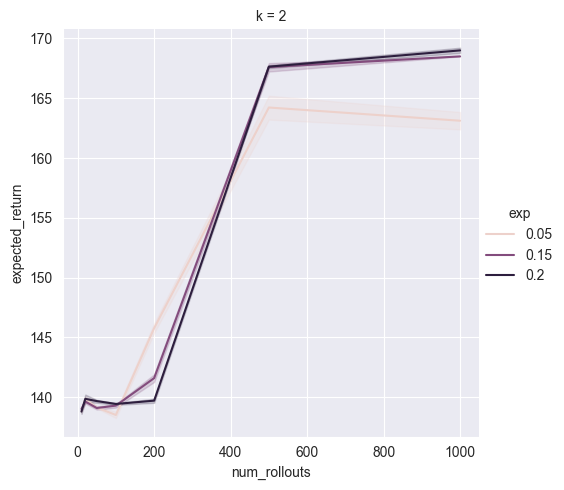

In [5]:
# Convert to DataFrame and visualize the results
df_ = pd.DataFrame(df)
df_.to_csv("df/df_AR.csv", index=False)
df_['expected_return'] = df_['expected_return'].astype(float)

sns.relplot(data=df_, x='num_rollouts', y='expected_return', hue='exp', kind='line', col='k',
            facet_kws={'sharey': True, 'sharex': True})
plt.savefig('trap_analysis.png')
plt.show()